# Проект: 
# Исследование рынка заведений общественного питания Москвы

<hr style="border: 2px solid green;" />

**Цель исследования**:

- Поиск подходящего места (района) для открытия кафе в Москве
 
**Задачи**: 
1. Исследовать соотношение видов объектов общественного питания по количеству. Построить график.
2. Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.
3. Проверить, для какого вида объекта общественного питания характерно сетевое распространение.
4. Проверить, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.
5. Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Определить, какой вид предоставляет в среднем самое большое количество посадочных мест. Постройте графики.
6. Построить график топ-10 улиц по количеству объектов общественного питания и проверить в каких районах Москвы находятся эти улицы.
7. Найти число улиц с одним объектом общественного питания и проверить в каких районах Москвы находятся эти улицы.
8. Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения и возможности развития сети. 

**Этапы выполнения проекта**:
 1. Знакомство с данными
 2. Предобработка данных
 3. Исследовательски анализ данных (EDA)
 4. Подготовка презентации

**Описание данных**


**Таблица rest_data:**
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

<hr style="border: 2px solid green;" />

### Итоги исследования

Вероятно, стоит рассмотреть следующие виды заведений и места под открытие:

1. Кафе с небольшим количеством мест (до 25-30) в поселении Сосенском. Это муниципальное образование, которое относится к району новой Москвы, где уже несколько лет идет строительство новых жилищных комплексов и развивается инфраструктура (в т.ч. туда протянули Сокольническую линию московского метро). За десять лет население п. Сосенского увеличилось втрое. Застройщики отводят первые этажи новых ЖК под коммерческую недвижимость, как правило — это небольшие помещения, которые можно рассмотреть под открытие кафе на 10-30 мест. Кроме того, можно рассмотреть открытие семейного кафе, т.к. в новых районах много молодых семей с детьми. 
** Риски: высокая конкуренция, большое количество заведений открывается, нужно продумать стратегию, чтобы выделиться, завоевать и удержать посетителей.  

2. Кафе на проспекте Вернадского (до 50 мест). На данной улице расположено много крупных университетов (МГУ, МГИМО, РАНХиГС, МИРЭА, МПГУ, Российский университет дружбы народов и другие). При открытии кафе, можно ориентироваться на студентов, преподавателей.
** Риски: дорогая аренда, сезонность.

<hr style="border: 2px solid green;" />

## Этап 1: Знакомство с данными

In [142]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from io import BytesIO
import requests as r
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [143]:
# Загрузка датасета

df = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\5_Рынок_заведений_общественного_питания_Москвы\rest_data.csv')

In [144]:
# Cбросим ограничения на количество выводимых столбцов

pd.set_option('display.max_columns', None)

# Настроим вывод всего текста

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [145]:
# Выведем необходимые данные с общей информацией по всем датасетам

tables = [df]
names = ['df']

for name, table in zip(names, tables):
    print(
        f'\n\033[1;30;46m_____________ДАТАСЕТ:  {name.upper()}_____________\033[0;0m\n',
        '\n\033[2;30;47m Вывод первых строк: \033[0;0m',
        )
    display(table.head(3))
    print('\n\033[2;30;47m Общая информация: \033[0;0m')
    display(table.info(memory_usage='deep'))
    print('\033[2;30;47m Подсчет доли пропусков в %: \033[0;0m')
    display(round(table.isnull().mean() * 100, 2))
    print(
        '\033[2;30;47m Подсчет дубликатов\033[0;0m', 
        '  ', round(table.duplicated().mean() * 100, 4),  ' %'
        )
    print('\n\033[2;30;47m Общая сводка строковых значений: \033[0;0m')
    try:
        display(table.describe(include=['object']).T)
    except:
        print('Датасет не содержит строковых значений')
    print('\n\033[2;30;47m Сводка числовых значений, включая даты: \033[0;0m')
    try:
        display(table.describe(datetime_is_numeric=True).T)
    except:
        print('Датасет не содержит числовых значений')
    print ('\n\033[01;30;46m_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________\033[0;0m\n\n')


_____________ДАТАСЕТ:  DF_____________
 
 Вывод первых строк: 


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.1 MB


None

 Подсчет доли пропусков в %: 


id            0.00
object_name   0.00
chain         0.00
object_type   0.00
address       0.00
number        0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
object_name,15366,10393,Столовая,267
chain,15366,2,нет,12398
object_type,15366,9,кафе,6099
address,15366,9108,"город Москва, Ходынский бульвар, дом 4",95



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
id,15366.00,119720.07,73036.13,838.00,28524.00,144974.50,184262.25,223439.00
number,15366.00,59.55,74.74,0.00,12.00,40.00,80.00,1700.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________




In [146]:
# Для детальной проверки дубликатов приведет названия сети в нижнему регистру
df['object_name'] =  df['object_name'].str.lower()

In [147]:
# Проверим наличие полных дубликатов
print("Количество полных дубликатов: {}".format(df.duplicated().sum()))

# Проверим наличие неполных дубликатов, без столбца ID 
print("Количество неполных дубликатов: {}".format(df.drop('id', axis=1).duplicated().sum()))

# Проверим наличие неполных дубликатов по столбцу с названием объекта
print("Количество дубликатов по колонке: {}".format(df['object_name'].duplicated().sum()))

Количество полных дубликатов: 0
Количество неполных дубликатов: 85
Количество дубликатов по колонке: 5442


In [148]:
# Посчитаем количество объектов, где 0 посадочных мест

print('Количество заведений, где ноль посадочных мест:', df[df["number"] == 0]['object_name'].count())

Количество заведений, где ноль посадочных мест: 1621


In [149]:
# Объект с наибольшим количеством посадочных мест

df[df['number'] > 1500]

,id,object_name,chain,object_type,address,number
12723,199696,arena by soho family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


### Выводы:

**_Датасет df_**
1. Датасет содержит 15366 записей о заведениях общественного питания Москвы;
2. Шесть (6) колонок датасета содержат данные о названии объекта общественного питания, типе объекта общественного питания, адресе, количестве посадочных мест, принадлежности к сети и ID объекта;
3. Пропуски в данных отсутствуют;     
4. Дубликаты в данных:
   - Полные дубликаты отсутствуют;
   - Количество неполных дубликатов (без колонки ID) - 85 шт;
   - Количество дубликатов по колонке с названием объекта (object_name) - 5442.
5. Ошибок в строковых значениях нет. Датасет содержит:
   - 15366 уникальных ID объектов общественного питания;
   - 10393 уникальных название объекта;
   - 9 типов объектов;
   - 9108 - уникальных адреса.
6. Датасет содержит числовые значения:
   - ID объекта общественного питания;
   - number - количестве посадочных мест. В данных есть 1621 заведения, где количество посадочных мест равно нулю, в основном они относятся к таким объектам, пекарня или кулинария.

### Внесение корректировок в датасеты (план для раздела Предобработки)

**_Что нужно скорректировать:_**

1. Выявить и исправить неявные дубликаты в названии объектов сети:
- Скорректировать различные варианты написания названий объектов в колонке object_name (так как данные собраны из различных мест, есть вероятность, что одинаковые заведения могли попасть в данные под разными ID)

2. Выделить название улицы
- Для последующего исследования необходимо вынести в отдельный столбец информацию с названием улицы из столбца address.  

<hr style="border: 2px solid green;" />

## Этап 2: Предобработка данных

**Задачи в данном этапе:**
- Провести предобработку колонки object_name
- Выделить улицу из колонки address
- Изучить данные колонки с количеством мест в заведении 

**_Задача 1: Провести предобработку колонки object_name_**

In [150]:
# Проверим количество уникальных названий объектов в колонке object_name 

len(list(df['object_name'].unique()))

9924

In [151]:
# Предобработка колонки object_name

df['object_name'] =  df['object_name'].str.replace('«', ' ')
df['object_name'] =  df['object_name'].str.replace('»', ' ')
df['object_name'] =  df['object_name'].str.replace('ресторан ', '')
df['object_name'] =  df['object_name'].str.replace('кальянная', '')
df['object_name'] =  df['object_name'].str.replace('кальян-бар ', '')
df['object_name'] =  df['object_name'].str.replace('кальян- бар ', '')
df['object_name'] =  df['object_name'].str.replace('лаундж-бар ', '')
df['object_name'] =  df['object_name'].str.replace('лаундж-бар ', '')
df['object_name'] =  df['object_name'].str.replace('кафе ', '')
df['object_name'] =  df['object_name'].str.replace('предприятие быстрого обслуживания ', '')
df['object_name'] =  df['object_name'].str.replace('кальянный клуб', '')
df['object_name'] =  df['object_name'].str.replace('бар ', '')
df['object_name'] =  df['object_name'].str.replace('магазин готовой еды  ', '')
df['object_name'] =  df['object_name'].str.replace('точка продажи готовой еды ', '')
df['object_name'] =  df['object_name'].str.replace('готовые блюда ', '')
df['object_name'] =  df['object_name'].str.replace(' готовые блюда для здорового питания', '')
df['object_name'] =  df['object_name'].str.replace('закусочная ', '') 
df['object_name'] =  df['object_name'].str.replace('быстрого питания ', '')
df['object_name'] =  df['object_name'].str.replace('пбо ', '')
df['object_name'] =  df['object_name'].str.replace('кофейня ', '') 
df['object_name'] =  df['object_name'].str.replace('кафейня ', '') 
df['object_name'] =  df['object_name'].str.replace('пиццерия ', '') 
df['object_name'] =  df['object_name'].str.replace('бильярдный клуб ', '') 
df['object_name'] =  df['object_name'].str.replace(' кофейня', '')
df['object_name'] =  df['object_name'].str.replace('буфет  ', '')
df['object_name'] =  df['object_name'].str.replace('буфет - ', '')

In [152]:
myata = df[df['object_name'].str.contains('мята lounge')]
myata['object_name'].value_counts()

мята lounge                  26
 мята lounge                  4
 мята lounge                  3
 мята lounge                  1
мята lounge шаболовка         1
мята lounge автозаводская     1
мята lounge октябрьская       1
  мята lounge                 1
Name: object_name, dtype: int64

In [153]:
df['object_name'] = df['object_name'].str.replace('мята lounge октябрьска', 'мята lounge')
df['object_name'] = df['object_name'].str.replace('мята lounge шаболовка', 'мята lounge')
df['object_name'] = df['object_name'].str.replace('мята lounge автозаводская', 'мята lounge')
df['object_name'] = df['object_name'].str.replace(' мята lounge', 'мята lounge')
df['object_name'] = df['object_name'].str.replace('  мята lounge', 'мята lounge')
df['object_name'] = df['object_name'].str.replace('мята loungeя', 'мята lounge')
df['object_name'] = df['object_name'].str.replace(' мята lounge', 'мята lounge')
df['object_name'] = df['object_name'].str.replace('мята lounge ', 'мята lounge')
df['object_name'] = df['object_name'].str.replace('мята lounge  ', 'мята lounge')

In [154]:
macdonalds = df[df['object_name'].str.contains('макд')]
macdonalds['object_name'].value_counts()

макдоналдс             152
 макдоналдс             19
москва - макдоналдс      1
макдоналдс               1
Name: object_name, dtype: int64

In [155]:
df['object_name'] = df['object_name'].str.replace(' макдоналдс', 'макдоналдс')
df['object_name'] = df['object_name'].str.replace('макдоналдс ', 'макдоналдс')

In [156]:
milti = df[df['object_name'].str.contains('милти')]
milti['object_name'].value_counts()

милти                          76
 милти                          3
милти                           3
милти для здорового питания     1
Name: object_name, dtype: int64

In [157]:
df['object_name'] = df['object_name'].str.replace(' милти', 'милти')
df['object_name'] = df['object_name'].str.replace('милти ', 'милти')

In [158]:
df['object_name'].unique()

array(['сметана', 'родник', ' академия ', ..., 'movenpick', 'fridays kfc',
       'marmalato'], dtype=object)

In [159]:
kfc = df[df['object_name'].str.contains('kfc')]
kfc['object_name'].value_counts()

kfc                  160
 kfc                  18
ростикс kfc            8
kfc волгоградский      1
 kfc покрышкина        1
kfc.                   1
fridays kfc            1
Name: object_name, dtype: int64

In [160]:
df['object_name'] = df['object_name'].str.replace(' kfc', 'kfc')
df['object_name'] = df['object_name'].str.replace('ростиксkfc', 'kfc')
df['object_name'] = df['object_name'].str.replace('kfc.', 'kfc')
df['object_name'] = df['object_name'].str.replace('kfc волгоградский', 'kfc')
df['object_name'] = df['object_name'].str.replace('kfcпокрышкина', 'kfc')
df['object_name'] = df['object_name'].str.replace('kfcволгоградский', 'kfc')
df['object_name'] = df['object_name'].str.replace('kfcлгоградский', 'kfc')
df['object_name'] = df['object_name'].str.replace('kfcрышкина ', 'kfc')
df['object_name'] = df['object_name'].str.replace('kfcшкина', 'kfc')

In [161]:
kfc = df[df['object_name'].str.contains('kfc')]
kfc['object_name'].value_counts()

kfc           188
kfc             1
fridayskfc      1
Name: object_name, dtype: int64

In [162]:
shokoladnitsa = df[df['object_name'].str.contains('шоколадница')]
shokoladnitsa['object_name'].value_counts()

шоколадница              162
 шоколадница              24
шоколадница кофе хаус      1
шоколадница экспресс       1
шоколадница кофемания      1
Name: object_name, dtype: int64

In [163]:
df['object_name'] = df['object_name'].str.replace(' шоколадница', 'шоколадница')
df['object_name'] = df['object_name'].str.replace('шоколадница ', 'шоколадница')

In [164]:
domino_pizza = df[df['object_name'].str.contains('домино')]
domino_pizza['object_name'].value_counts()

домино'с пицца                   90
 домино'с пицца                   8
винотека кино вино и домино       1
домино'с пицца domino,s pizza     1
доминос пицца                     1
доминос                           1
Name: object_name, dtype: int64

In [165]:
df['object_name'] = df['object_name'].str.replace(" домино'с пицца", 'доминос пицца')
df['object_name'] = df['object_name'].str.replace("домино'с пицца", 'доминос пицца')
df['object_name'] = df['object_name'].str.replace("доминос пицца ", 'доминос пицца')
df['object_name'] = df['object_name'].str.replace("доминос пицца domino,s pizza", 'доминос пицца')

In [166]:
tanuki = df[df['object_name'].str.contains('тануки')]
tanuki['object_name'].value_counts()

тануки      35
 тануки     12
Name: object_name, dtype: int64

In [167]:
df['object_name'] = df['object_name'].str.replace(' тануки', 'тануки')
df['object_name'] = df['object_name'].str.replace('тануки ', 'тануки') 

In [168]:
yakitoria = df[df['object_name'].str.contains('якитория')]
yakitoria['object_name'].value_counts()

якитория                39
 якитория               10
якитория и ян примус     1
якитория и спорт бар     1
Name: object_name, dtype: int64

In [169]:
df['object_name'] = df['object_name'].str.replace(' якитория', 'якитория')
df['object_name'] = df['object_name'].str.replace('якитория ', 'якитория') 

In [170]:
azbuka_vkusa = df[df['object_name'].str.contains('азбука вкуса')]
df['object_name'] = df['object_name'].str.replace(' азбука вкуса ', 'азбука вкуса') 
azbuka_vkusa['object_name'].value_counts()

азбука вкуса             16
ав-дейли азбука вкуса     1
 азбука вкуса             1
Name: object_name, dtype: int64

In [171]:
dablbi = df[df['object_name'].str.contains('дабл')]
dablbi['object_name'].value_counts()

даблби                        14
дабл би                        6
 даблби                        4
 дабл би                       1
дабл би-кофейня                1
дабл би блэк                   1
дабл капс                      1
 пробка и штопор и даблби      1
Name: object_name, dtype: int64

In [172]:
df['object_name'] = df['object_name'].str.replace('дабл би', 'даблби')
df['object_name'] = df['object_name'].str.replace(' даблби', 'даблби')
df['object_name'] = df['object_name'].str.replace(' дабл би', 'даблби')
df['object_name'] = df['object_name'].str.replace('даблби ', 'даблби')

In [173]:
prime = df[df['object_name'].str.contains('prime|прайм')]
prime['object_name'].value_counts()

прайм стар                     27
прайм                          10
прайм-кафе                      7
prime прайм стар                5
prime                           4
prime прайм стар прайм-кафе     2
 prime  прайм стар              2
 prime cafe                     1
prime cafe                      1
праймбифбар                     1
прайм биф улица                 1
 prime star                     1
прайм биф                       1
deli by prime прайм-кафе        1
 праймбиф                       1
prime star прайм стар           1
black star burger prime         1
чикаго прайм                    1
 prime mart                     1
 boston prime                   1
 prime                          1
 прайм стар                     1
прайм стар кафе                 1
 prime  (прайм стар)            1
праймстар ресторантс групп      1
прайм-прайм стар                1
prime beef                      1
праймпрайм стар                 1
праймстар                       1
Name: object_n

In [174]:
df['object_name'] = df['object_name'].str.replace('prime прайм стар', 'прайм')
df['object_name'] = df['object_name'].str.replace('прайм стар', 'прайм')
df['object_name'] = df['object_name'].str.replace('прайм-кафе', 'прайм')
df['object_name'] = df['object_name'].str.replace('прайм-кафе', 'прайм')
df['object_name'] = df['object_name'].str.replace('prime', 'прайм')
df['object_name'] = df['object_name'].str.replace(' prime  прайм стар', 'прайм')
df['object_name'] = df['object_name'].str.replace(' прайм стар', 'прайм')
df['object_name'] = df['object_name'].str.replace('prime cafe', 'прайм')
df['object_name'] = df['object_name'].str.replace('прайм прайм', 'прайм')
df['object_name'] = df['object_name'].str.replace(' прайм', 'прайм')
df['object_name'] = df['object_name'].str.replace('прайм cafe', 'прайм')
df['object_name'] = df['object_name'].str.replace('праймстар', 'прайм')
df['object_name'] = df['object_name'].str.replace('прайм ', 'прайм')
df['object_name'] = df['object_name'].str.replace('праймstarпрайм ', 'прайм')
df['object_name'] = df['object_name'].str.replace('праймstarпрайм', 'прайм')
df['object_name'] = df['object_name'].str.replace('праймstar', 'прайм')
df['object_name'] = df['object_name'].str.replace('праймкафе', 'прайм')

In [175]:
khleb = df[df['object_name'].str.contains('насущный')]
khleb['object_name'].value_counts()

хлеб насущный      33
 хлеб насущный      3
Name: object_name, dtype: int64

In [176]:
df['object_name'] = df['object_name'].str.replace(' хлеб насущный', 'хлеб насущный')
df['object_name'] = df['object_name'].str.replace('хлеб насущный ', 'хлеб насущный')

In [177]:
subway= df[df['object_name'].str.contains('сабв|sub')]
subway['object_name'].value_counts()

subway                 34
сабвей                 20
 subway                 4
glowsubs sandwiches     3
сабвэй                  2
 сабвей  старбакс       2
сабвей сушивок          1
сабвей subway           1
 сабвэй                 1
Name: object_name, dtype: int64

In [178]:
df['object_name'] = df['object_name'].str.replace(' сабвэй', 'сабвей')
df['object_name'] = df['object_name'].str.replace('сабвэй', 'сабвей')
df['object_name'] = df['object_name'].str.replace(' сабвэй', 'сабвей')
df['object_name'] = df['object_name'].str.replace('сабвей subway', 'сабвей')
df['object_name'] = df['object_name'].str.replace('сабвей ', 'сабвей')
df['object_name'] = df['object_name'].str.replace('subway', 'сабвей')
df['object_name'] = df['object_name'].str.replace(' subway', 'сабвей')
df['object_name'] = df['object_name'].str.replace(' сабвей', 'сабвей')

In [179]:
burgerking= df[df['object_name'].str.contains('кинг|king')]
burgerking['object_name'].value_counts()

бургер кинг                 140
 бургер кинг                 13
бургер кинг burger king       7
донер кинг                    2
английский паб букингем       1
лаки кинг                     1
бурген кинг                   1
burgerking                    1
шаурма кинг                   1
вьет кинг                     1
кафе- бургер кинг             1
two smocking barrels pub      1
кебабкинг                     1
im smoking                    1
 kings                        1
би-би-кинг                    1
kingberry                     1
Name: object_name, dtype: int64

In [180]:
df['object_name'] = df['object_name'].str.replace(' бургер кинг', 'бургер кинг')
df['object_name'] = df['object_name'].str.replace('бургер кинг burger king', 'бургер кинг')
df['object_name'] = df['object_name'].str.replace('кафе- бургер кинг', 'бургер кинг')
df['object_name'] = df['object_name'].str.replace('burgerking', 'бургер кинг')
df['object_name'] = df['object_name'].str.replace('бурген кинг', 'бургер кинг')
df['object_name'] = df['object_name'].str.replace('бургер кинг ', 'бургер кинг')
df['object_name'] = df['object_name'].str.replace('кафе-бургер кинг', 'бургер кинг')

In [181]:
shtolle= df[df['object_name'].str.contains('штол')]
shtolle['object_name'].value_counts()

штолле              14
 штолле              4
пироги штолле        1
пироговая штолле     1
Name: object_name, dtype: int64

In [182]:
df['object_name'] = df['object_name'].str.replace(' штолле', 'штолле')
df['object_name'] = df['object_name'].str.replace('пироговаяштолле', 'штолле')
df['object_name'] = df['object_name'].str.replace('штолле ', 'штолле')
df['object_name'] = df['object_name'].str.replace('пирогиштолле', 'штолле')

In [183]:

starbucks= df[df['object_name'].str.contains('старб')]
starbucks['object_name'].value_counts()

старбакс                    21
 старбакс                    6
старбакс starbucks           3
сабвей старбакс              2
 старбакс кофе               1
старбакс кофе                1
starbucks, старбакс кофе     1
starbucks старбакс           1
старбагс                     1
Name: object_name, dtype: int64

In [184]:
df['object_name'] = df['object_name'].str.replace(' старбакс', 'старбакс')
df['object_name'] = df['object_name'].str.replace('старбакс starbucks', 'старбакс')
df['object_name'] = df['object_name'].str.replace('старбакс кофе', 'старбакс')
df['object_name'] = df['object_name'].str.replace(' старбакс кофе', 'старбакс')
df['object_name'] = df['object_name'].str.replace('starbucks старбакс', 'старбакс')
df['object_name'] = df['object_name'].str.replace('старбагс', 'старбакс')
df['object_name'] = df['object_name'].str.replace('starbucks, старбакс кофе', 'старбакс')
df['object_name'] = df['object_name'].str.replace('старбакс ', 'старбакс')
df['object_name'] = df['object_name'].str.replace('starbucks,старбакс', 'старбакс')
df['object_name'] = df['object_name'].str.replace('starbucksстарбакс', 'старбакс')

In [185]:
teremok= df[df['object_name'].str.contains('терем')]
teremok['object_name'].value_counts()

теремок              97
 теремок             14
теремок инвест        2
теремок-инвест        2
терем                 1
восточный теремок     1
Name: object_name, dtype: int64

In [186]:
df['object_name'] = df['object_name'].str.replace(' теремок', 'теремок')
df['object_name'] = df['object_name'].str.replace('теремок ', 'теремок')

In [187]:
lambic= df[df['object_name'].str.contains('ламб|lamb')]
lambic['object_name'].value_counts()

lambic                  4
ламбик                  2
lambic брассерия        1
гриль хаус lamb cook    1
brasserie lambic        1
брассерия ламбик        1
Name: object_name, dtype: int64

In [188]:
df['object_name'] = df['object_name'].str.replace('lambic', 'ламбик')

In [189]:
# Количество уникальных названий объектов сократилось до 9631

len(list(df['object_name'].unique()))

9631

**_Задача 2: Выделить улицу из колонки address_**

In [190]:
# Выделяем название улицы из колокнки address

df['street'] = df['address'].apply(lambda x: x.split(',')[1])
df['street'] = df['street'].str.strip()
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [191]:
# Проверяем наличие пропусков в колонке street

df['street'].isna().any()

False

### Выводы:

1. Скорректированы названия сетей в колонке object_name:
- Текст приведен к нижнему регистру;
- Удалены лишние пробелы, дефисы;
- Названия в рамках одной сети приведены к общему стилю написания

Итог: после проведения предобработки число уникальных названий сократилось на 3% (с 9924 до 9631). 

2. Название улицы выделено в отдельную колонку 

<hr style="border: 2px solid green;" />

## Этап 3: Исследовательский анализ данных

**Задачи**: 
1. Исследовать соотношение видов объектов общественного питания по количеству. Построить график.
2. Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.
3. Проверить, для какого вида объекта общественного питания характерно сетевое распространение.
4. Проверить, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.
5. Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Определить, какой вид предоставляет в среднем самое большое количество посадочных мест. Постройте графики.
6. Построить график топ-10 улиц по количеству объектов общественного питания и проверить в каких районах Москвы находятся эти улицы.
7. Найти число улиц с одним объектом общественного питания и проверить в каких районах Москвы находятся эти улицы.
8. Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения и возможности развития сети. 

### 1. Соотношение видов объектов общественного питания по количеству

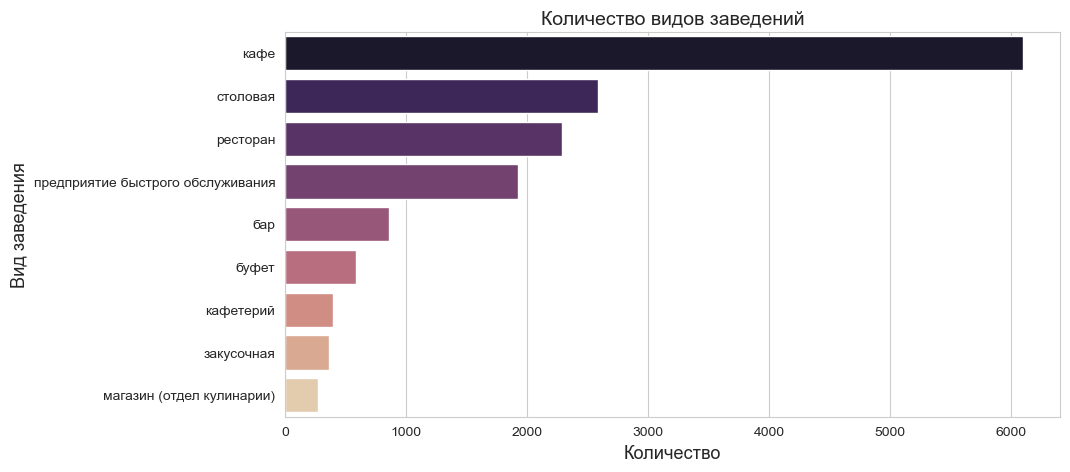

,object_type,quantity,share
0,кафе,6099,0.40
1,столовая,2587,0.17
2,ресторан,2285,0.15
3,предприятие быстрого обслуживания,1923,0.13
4,бар,856,0.06
5,буфет,585,0.04
6,кафетерий,398,0.03
7,закусочная,360,0.02
8,магазин (отдел кулинарии),273,0.02


In [192]:
# Подсчёт количества типов объектов

object_type_count = (
    df.groupby('object_type')['object_type'].count()
    .to_frame()
    .rename(columns={'index':'object_type', 'object_type':'quantity'})
    .sort_values(by='quantity', ascending=False)
    .reset_index()
)

object_type_count['share'] = object_type_count['quantity'] / object_type_count['quantity'].sum()

plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(x='quantity', y='object_type', data=object_type_count, palette="magma", saturation=.5)
sns.set_style("whitegrid")
#plt.xticks(rotation=70)
plt.title('Количество видов заведений', size=14)
plt.xlabel('Количество', size=13)
plt.ylabel('Вид заведения', size=13)
plt.show()

object_type_count

**Выводы к задаче 1:**

Самые многочисленные виды объектов общественного питания в Москве: 
* Кафе - 40%;
* Столовая - 17%;
* Ресторан - 15%;
* Предприятие быстрого обслуживания - 13%.

Наименее популярны (меньше 3% от всех заведений):
* Кафетерий;
* Закусочная;
* Магазин (отдел кулинарии).

### 2. Соотношение сетевых и несетевых заведений по количеству  

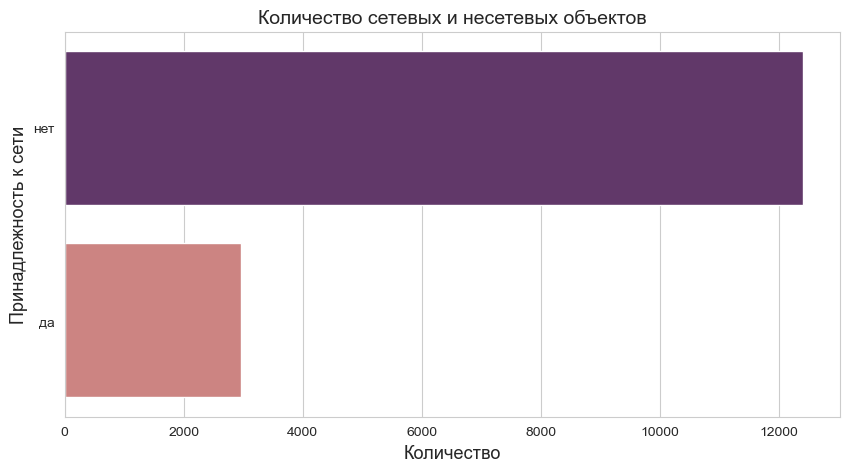

,chain,quantity,share
0,нет,12398,0.81
1,да,2968,0.19


In [193]:
# Подсчёт количества сетевых и несетевых объектов

chain_count = (
    df.groupby('chain')['chain'].count()
    .to_frame()
    .rename(columns={'index':'chain', 'chain':'quantity'})
    .sort_values(by='quantity', ascending=False)
    .reset_index()
)

chain_count['share'] = chain_count['quantity'] / chain_count['quantity'].sum()

plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(y='chain', x='quantity', data=chain_count, palette="magma", saturation=.5)
sns.set_style("whitegrid")
#plt.xticks(rotation=70)
plt.title('Количество сетевых и несетевых объектов', size=14)
plt.xlabel('Количество', size=13)
plt.ylabel('Принадлежность к сети', size=13)
plt.show()

chain_count

**Выводы к задаче 2:**

- В Москве преобладают несетевые объекты общественного питания - 81% против 19% сетевых.

### 3. Виды объектов общественного питания, для которых характерно сетевое распространение

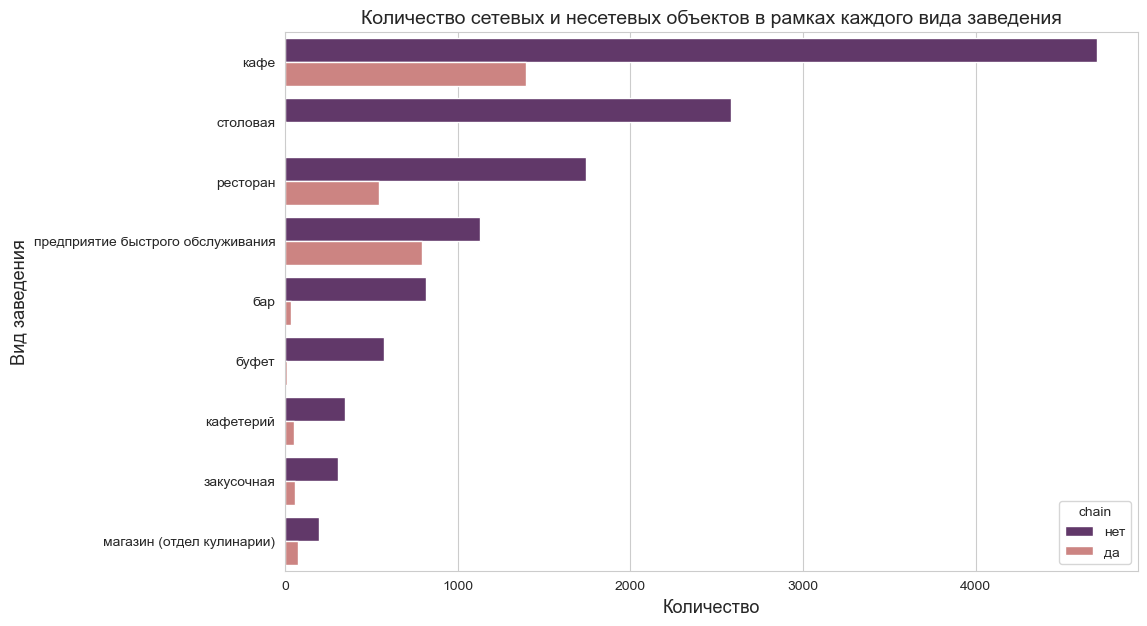

,object_type,chain,quantity
15,бар,да,37
5,бар,нет,819
7,буфет,нет,574
16,буфет,да,11
10,закусочная,нет,304
13,закусочная,да,56
0,кафе,нет,4703
3,кафе,да,1396
14,кафетерий,да,52
9,кафетерий,нет,346


In [194]:
# Подсчёт количества сетевых и несетевых заведений в рамках каждого вида

chain_type_count = (
    df.groupby(['object_type', 'chain'])['chain'].count()
    .to_frame()
    .rename(columns={'index':'chain', 'chain':'quantity'})
    .sort_values(by='quantity', ascending=False)
    .reset_index()
)

#chain_type_count['share'] = chain_type_count['quantity'] / chain_type_count['quantity'].sum()

plt.figure(figsize=(11, 7))
plt.grid(True)
sns.barplot(y='object_type', x='quantity', data=chain_type_count, hue='chain', palette="magma", saturation=.5)
sns.set_style("whitegrid")
#plt.xticks(rotation=70)
plt.title('Количество сетевых и несетевых объектов в рамках каждого вида заведения', size=14)
plt.xlabel('Количество', size=13)
plt.ylabel('Вид заведения', size=13)
plt.show()

chain_type_count.sort_values(by='object_type')

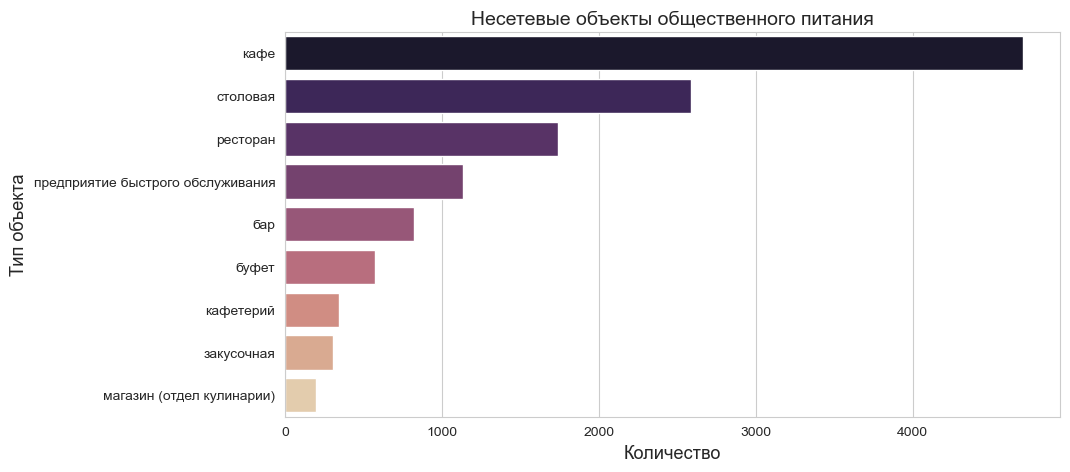

,object_type,chain,quantity,share
0,кафе,нет,4703,0.38
1,столовая,нет,2584,0.21
2,ресторан,нет,1741,0.14
3,предприятие быстрого обслуживания,нет,1132,0.09
4,бар,нет,819,0.07
5,буфет,нет,574,0.05
6,кафетерий,нет,346,0.03
7,закусочная,нет,304,0.02
8,магазин (отдел кулинарии),нет,195,0.02


In [195]:
# Соотношение несетевых видов объектов общественного питания

not_chain_type = df[df['chain'] == 'нет']

not_chain_type_count = (
    not_chain_type.groupby(['object_type', 'chain'])['chain'].count()
    .to_frame()
    .rename(columns={'index':'chain', 'chain':'quantity'})
    .sort_values(by='quantity', ascending=False)
    .reset_index()
)

not_chain_type_count['share'] = not_chain_type_count['quantity'] / not_chain_type_count['quantity'].sum()

plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(y='object_type', x='quantity', data=not_chain_type_count, palette="magma", saturation=.5)
sns.set_style("whitegrid")
#plt.xticks(rotation=70)
plt.title('Несетевые объекты общественного питания', size=14)
plt.xlabel('Количество', size=13)
plt.ylabel('Тип объекта', size=13)
plt.show()

not_chain_type_count

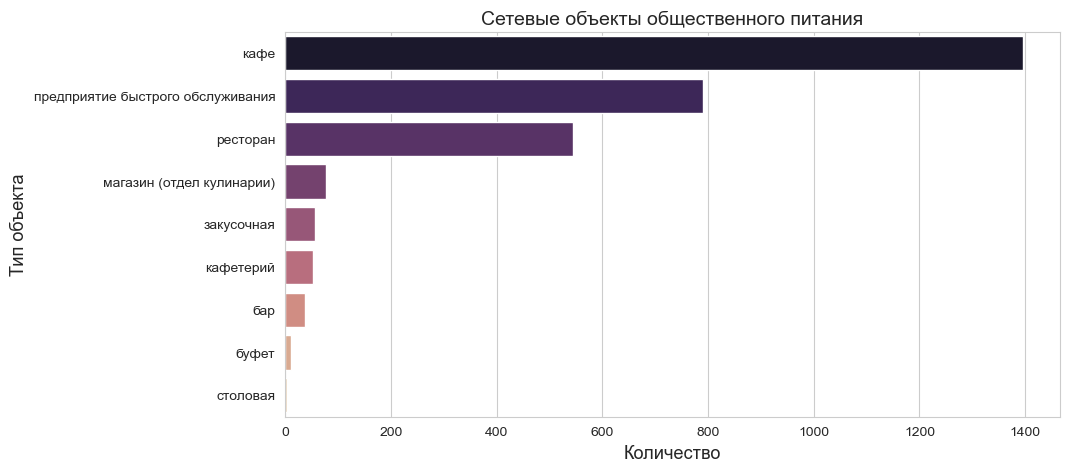

,object_type,chain,quantity,share
0,кафе,да,1396,0.47
1,предприятие быстрого обслуживания,да,791,0.27
2,ресторан,да,544,0.18
3,магазин (отдел кулинарии),да,78,0.03
4,закусочная,да,56,0.02
5,кафетерий,да,52,0.02
6,бар,да,37,0.01
7,буфет,да,11,0.00
8,столовая,да,3,0.00


In [196]:
# Соотношение сетевых видов объектов общественного питания 

chain_type = df[df['chain'] == 'да']

is_chain_type_count = (
    chain_type.groupby(['object_type', 'chain'])['chain'].count()
    .to_frame()
    .rename(columns={'index':'chain', 'chain':'quantity'})
    .sort_values(by='quantity', ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(y='object_type', x='quantity', data=is_chain_type_count, palette="magma", saturation=.5)
sns.set_style("whitegrid")
#plt.xticks(rotation=70)
plt.title('Сетевые объекты общественного питания', size=14)
plt.xlabel('Количество', size=13)
plt.ylabel('Тип объекта', size=13)
plt.show()


is_chain_type_count['share'] = is_chain_type_count['quantity'] / is_chain_type_count['quantity'].sum()
is_chain_type_count

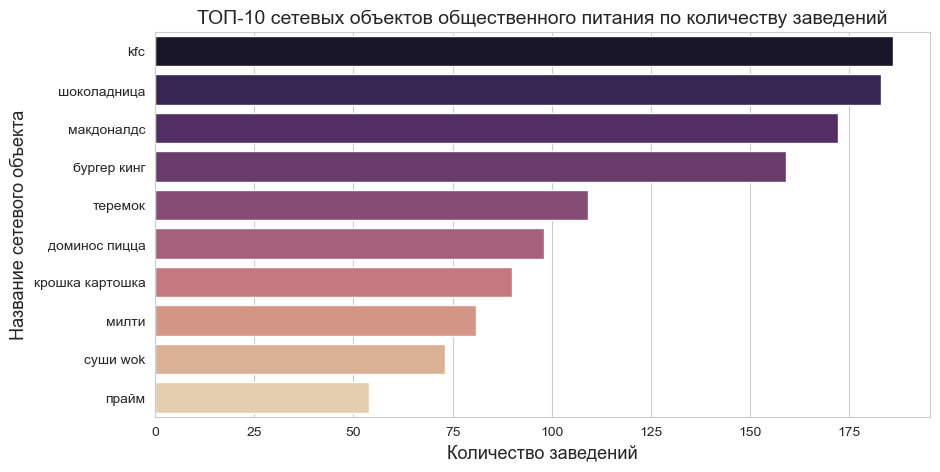

,object_name,quantity,share
0,kfc,186,0.15
1,шоколадница,183,0.15
2,макдоналдс,172,0.14
3,бургер кинг,159,0.13
4,теремок,109,0.09
5,доминос пицца,98,0.08
6,крошка картошка,90,0.07
7,милти,81,0.07
8,суши wok,73,0.06
9,прайм,54,0.04


In [197]:
# Выделим ТОП-10 сетевых объектов общественного питания по количеству заведений

chain_objects = (
    chain_type.groupby('object_name')['id'].count()
    .to_frame()
    .rename(columns={'id':'quantity'})
    .sort_values(by='quantity', ascending=False)
    .reset_index()
    .head(10)
)


plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(y='object_name', x='quantity', data=chain_objects, palette="magma", saturation=.5)
sns.set_style("whitegrid")
#plt.xticks(rotation=70)
plt.title('ТОП-10 сетевых объектов общественного питания по количеству заведений', size=14)
plt.xlabel('Количество заведений', size=13)
plt.ylabel('Название сетевого объекта', size=13)
plt.show()

chain_objects['share'] = chain_objects['quantity'] / chain_objects['quantity'].sum()
chain_objects

**Выводы к задаче 3:**

1. Топ-три несетевых объектов:
- кафе (37%)
- столовые (21%)
- ресторан (14%)

2. Топ-три сетевых объектов:
- кафе (47%)
- предприятия быстрого обслуживания (26.6%)
- ресторан (18%)

Таким образом, сетевое распределение характерно для кафе, ресторанов и предприятий быстрого обслуживания, в то время как, например, столовым и буфетам скорее не принадлежат определенной сети. 

3. ТОП-10 сетевых объектов общественного питания по количеству заведений:
- KFS (15%)
- Шоколадница (15%)
- Макдональдс (14%)

### 4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

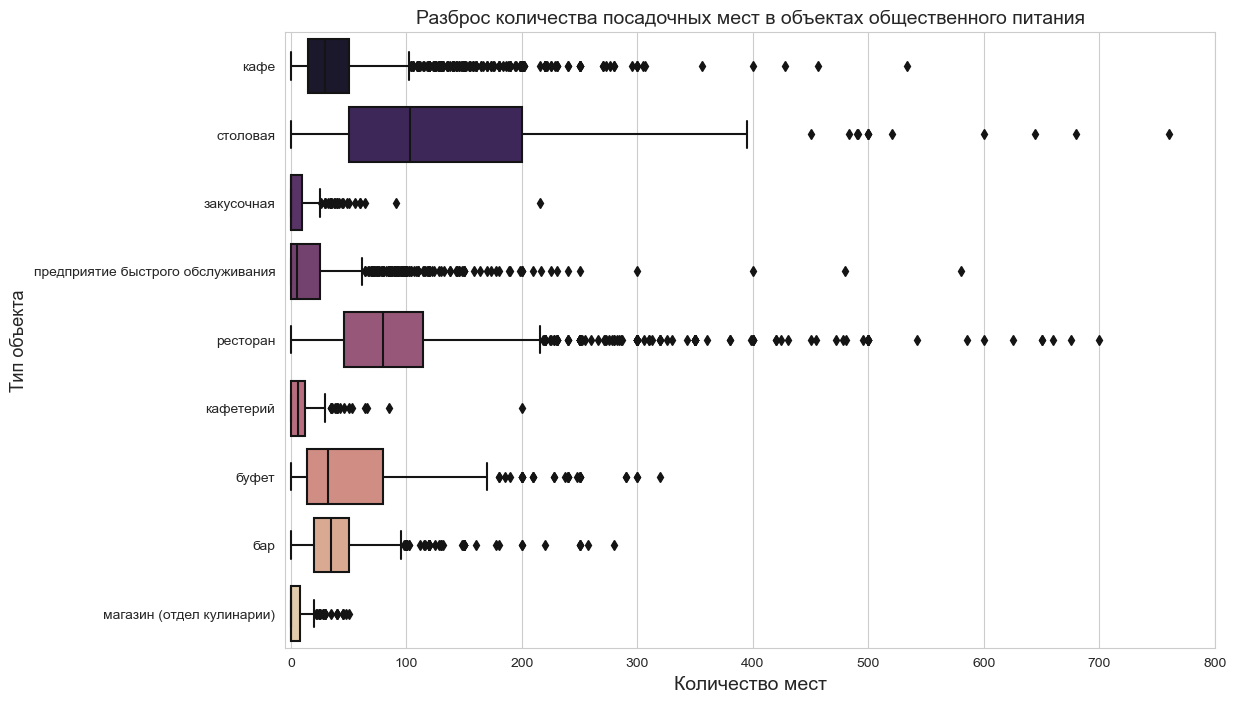

In [198]:
plt.figure(figsize=(12, 8))
plt.grid(True)
sns.boxplot(y="object_type", x="number", data=df, palette="magma", saturation=.5)
sns.set_style("whitegrid")
plt.title('Разброс количества посадочных мест в объектах общественного питания', size=14)
plt.xlabel('Количество мест', size=14)
plt.ylabel('Тип объекта', size=13)
plt.xlim(-5, 800)
plt.show();

**Комментарии к графику:**

Характерное количество посадочных мест в зависимости от типа заведения:
- У столовых самый большой разброс по количеству посадочных мест (от 0 до 400), далее идут рестораны (от 0 до 220) и буфеты (от 0 до 180)
- У кафе и баров разброс количества посадочных мест от 0 до 100, но есть довольно много нестандартных заведений этого типа, где количество мест превышает 100.

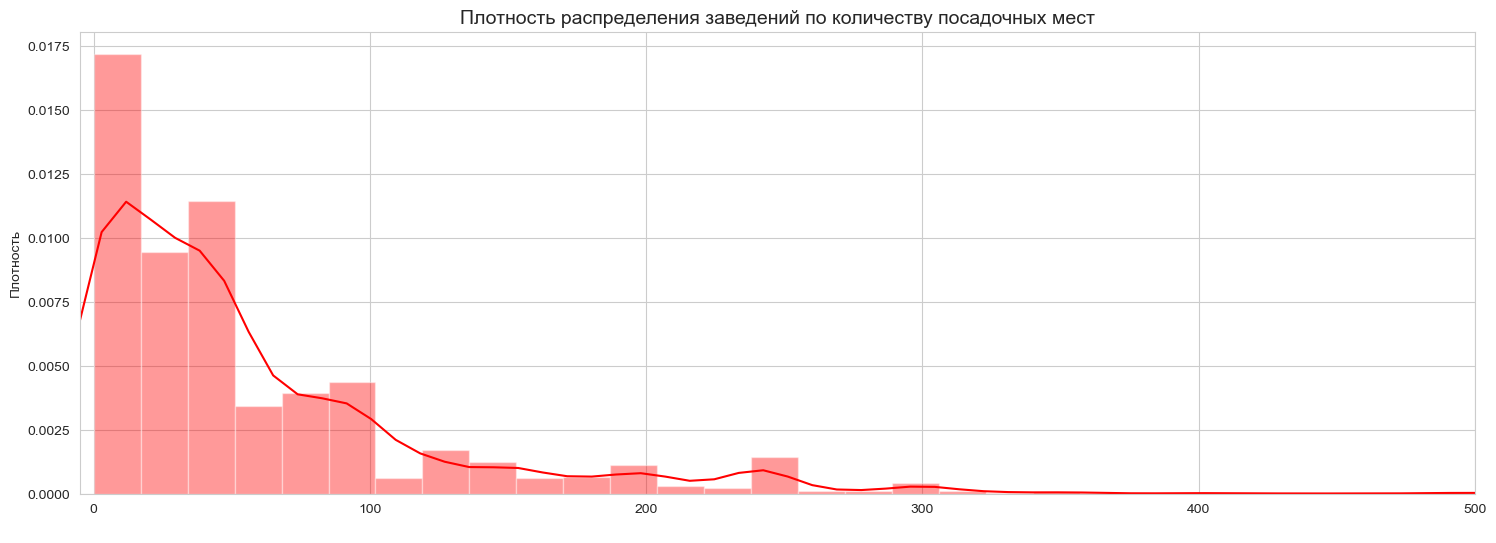

In [199]:
plt.figure(figsize=(18,6))
plt.grid(True)
sns.distplot(df['number'], bins=100, color="r")
plt.title('Плотность распределения заведений по количеству посадочных мест', size=14)
plt.xlabel(' ')
plt.ylabel('Плотность')
plt.xlim(-5, 500);

**Комментарии к графику:**

- Можно предположить, что в Москве преобладают заведения, где количество посадочных мест не превышает 50;
- Далее плотность распределения снижается на шаге с 50 до 100 посадочных мест, однако таких заведений все еще относительно много;
- Заведения, где более 100 посадочных мест - редкое явление в городе.

In [200]:
# Посчитаем количество объектов, где 0 посадочных мест

print('Количество заведений, где ноль посадочных мест:', df[df["number"] == 0]['object_name'].count())

Количество заведений, где ноль посадочных мест: 1621


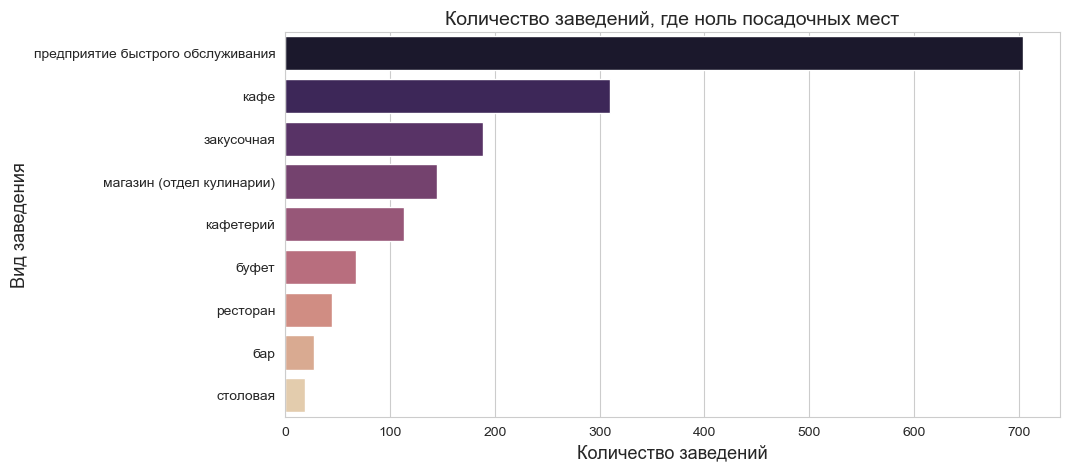

,object_type,quantity,share
0,предприятие быстрого обслуживания,704,0.43
1,кафе,310,0.19
2,закусочная,189,0.12
3,магазин (отдел кулинарии),145,0.09
4,кафетерий,113,0.07
5,буфет,68,0.04
6,ресторан,45,0.03
7,бар,28,0.02
8,столовая,19,0.01


In [201]:
# Исследуем заведения, где ноль посадочных мест

zero_seat_object = (
    df[df["number"] == 0].groupby('object_type')['object_type'].count()
    .to_frame()
    .rename(columns={'index':'object_type', 'object_type':'quantity'})
    .sort_values(by='quantity', ascending=False)
    .reset_index()
)

zero_seat_object['share'] = zero_seat_object['quantity'] / zero_seat_object['quantity'].sum()

plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(x='quantity', y='object_type', data=zero_seat_object, palette="magma", saturation=.5)
sns.set_style("whitegrid")
#plt.xticks(rotation=70)
plt.title('Количество заведений, где ноль посадочных мест', size=14)
plt.xlabel('Количество заведений', size=13)
plt.ylabel('Вид заведения', size=13)
plt.show()

zero_seat_object

**Выводы к задаче 4:**

**Плотность распределения посадочных мест:**
- Можно предположить, что в Москве преобладают заведения, где количество посадочных мест не превышает 50;
- Далее плотность распределения снижается на шаге с 50 до 100 посадочных мест, однако таких заведений все еще относительно много;
- Заведения, где более 100 посадочных мест - редкое явление в городе.

**Характерное количество посадочных мест в зависимости от типа заведения:**
- У столовых самый большой разброс по количеству посадочных мест (от 0 до 400), далее идут рестораны (от 0 до 220) и буфеты (от 0 до 180)
- Для кафе и баров характерно от 0 до 100 посадочных мест, однако есть довольно много нестандартных заведений этого типа, где количество мест превышает 100.

**Количество заведений, где ноль посадочных мест:**
- В данных 1621 заведение, где ноль посадочных мест, среди них:
     - 43% - предприятие быстрого обслуживания;
     - 19% - кафе;
     - 12% - закусочная;
     - 9% - магазин (отдел кулинарии)	

### 5. Среднее количество посадочных мест для каждого вида объекта общественного питания. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

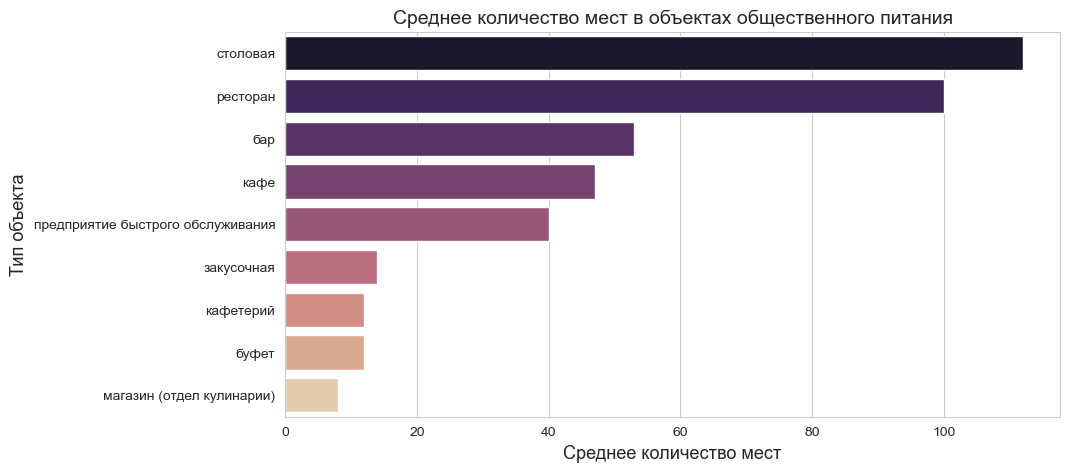

,object_type,object_count,seats_sum,seats_mean,share
8,столовая,3,337,112,0.89
2,ресторан,544,54527,100,1.00
6,бар,37,1962,53,1.89
0,кафе,1396,66208,47,2.11
1,предприятие быстрого обслуживания,791,31772,40,2.49
4,закусочная,56,805,14,6.96
5,кафетерий,52,638,12,8.15
7,буфет,11,140,12,7.86
3,магазин (отдел кулинарии),78,677,8,11.52


In [202]:
chain_seats_count = (
    chain_type.groupby('object_type').agg({'id': 'count', 'number': 'sum'})
    .rename(columns={'id':'object_count', 'number':'seats_sum'})
    .astype(int)        
    .sort_values(by='object_count', ascending=False)
    .reset_index()
)
    
chain_seats_count['seats_mean'] =  (chain_seats_count['seats_sum'] / chain_seats_count['object_count']).astype(int)
chain_seats_count['share'] =  (chain_seats_count['object_count'] / chain_seats_count['seats_sum']) * 100
chain_seats_count

plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(y='object_type', x='seats_mean', data=chain_seats_count.sort_values(by='seats_mean', ascending=False), palette="magma", saturation=.5)
sns.set_style("whitegrid")
#plt.xticks(rotation=70)
plt.title('Среднее количество мест в объектах общественного питания', size=14)
plt.xlabel('Среднее количество мест', size=13)
plt.ylabel('Тип объекта', size=13)
plt.show()

chain_seats_count.sort_values(by='seats_mean', ascending=False)

**Выводы к задаче 5:**

1. Для столовых и ресторанов характерно иметь большое количество мест (в среднем 100-112) в одном заведении. 
2. Для кафе и предприятий быстрого обслуживания относительно много заведений со средним количеством мест (40-50).  
3. Сетевых баров не очень много, но в среднем в заведении 53 места.
4. Для закусочных, кафетериев, буфетов и отделов кулинарии характерно небольшое количество заведений с маленьким количеством посадочных мест (в среднем от 14 до 8). 

### 6. Топ-10 улиц по количеству объектов общественного питания.

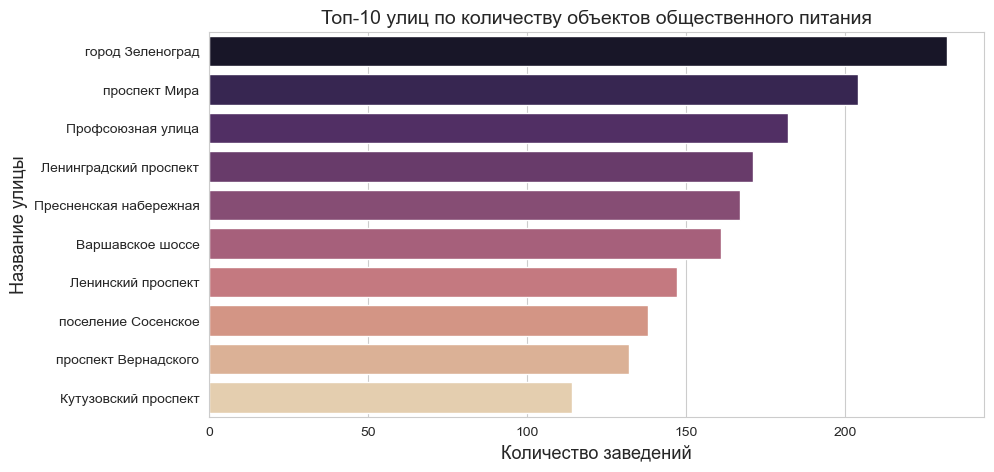

,street,object_count
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
7,поселение Сосенское,138
8,проспект Вернадского,132
9,Кутузовский проспект,114


In [203]:
top_10_streets = (
    df.groupby('street')['object_name'].count()
    .sort_values(ascending=False)
    .head(10)
    .to_frame()
    .reset_index()
    .rename(columns={'object_name': 'object_count'})
)

plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(x='object_count', y='street', data=top_10_streets, palette="magma", saturation=.5)
sns.set_style("whitegrid")
#plt.xticks(rotation=70)
plt.title('Топ-10 улиц по количеству объектов общественного питания', size=14)
plt.xlabel('Количество заведений', size=13)
plt.ylabel('Название улицы', size=13)
plt.show()

top_10_streets

**Комментарий:**

Для ответа на вопрос в каких районах\округах Москвы находятся эти улицы, воспользуемся внешней информацией. Обратимся к Яндекс.Картам через API и получим координаты заведений из Топ-10 улиц по количеству объектов общественного питания.
Осуществим действия в несколько этапов:
1. В отдельный датасет сохраним данные Топ-10 улиц (top10_streets_df)
2. Воспользуемся геокодером для получения координат заведений
   - Полученный датасет top10_streets_df содержит 1648 строк. При использовании геокодера существует лимит маршрутизации и геокодирования, но, в данном случае, мы его не превышаем.
3. Визуализируем точки на карте с помощью plotly express
4. Воспользуемся внешним датафреймом, где хранятся данные с названиями улиц и районов Москвы и объединим их с top10_streets_df

In [204]:
# Сохраним датасет с данными топ-10 улиц по количеству объектов общественного питания 

top_10_streets_list = top_10_streets['street'].tolist()
top10_streets_df = df.query('street == @top_10_streets_list')
print(top10_streets_df.shape)
#top10_streets_df.head()

(1648, 7)


In [205]:
# api = 'aaace069-3195-4fd5-8366-88627e4f0ece'
# url = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey={}&geocode='.format(api)
# url_formatted = url + 'город Москва, улица Егора Абакумова, дом 9'
# response = r.get(url_formatted).json()
# response

In [206]:
# Функция для получении координат и записи их в датафрейм

# latitudes = []
# longitudes = []

# for rest_address in top10_streets_df['address']:
#     if rest_address == rest_address: 
#         url_formatted = url + 'Москва, ' + rest_address  
#                                                          
#         response = r.get(url_formatted).json()
#         try:  
#             point = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point'].get('pos')
#         except: 
#             pass
#         if point is not None: 
#             latitude = float(point.split()[1].lstrip('('))
#             longitude = float(point.split()[0].lstrip('('))
#             latitudes.append(latitude)
#             longitudes.append(longitude)
#         else:  
#             latitudes.append('')
#             longitudes.append('')  
#     else:  
#         latitudes.append('')
#         longitudes.append('') 

# top10_streets_df['latitude'] = latitudes
# top10_streets_df['longitude'] = longitudes

In [207]:
# Сохраним датасет с координатами и загрузим в ноутбук, чтобы повторно не обращаться к геокодеру и не превышать лимит обращений

#top10_streets_df = top10_streets_df.to_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\5_Рынок_заведений_общественного_питания_Москвы\top10_streets_df.csv', sep=';', encoding='utf-8-sig')
top10_streets_df = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\5_Рынок_заведений_общественного_питания_Москвы\top10_streets_df.csv', index_col=0, sep=';', encoding='utf-8-sig')

# Получили датафрейм с данными об улицах Москвы
print(top10_streets_df.shape)
top10_streets_df.head(3)

(1648, 9)


,id,object_name,chain,object_type,address,number,street,latitude,longitude
151,155973,андерсон,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,55.70,37.62
152,23618,сабвей,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,55.70,37.62
153,155852,ламаджо,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,55.69,37.62


In [208]:
# Cтроим карту с визуализацией всех точек

fig = px.scatter_mapbox(top10_streets_df, lon='longitude', lat='latitude', zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show();

In [209]:
# Подгружаем дополнительный датасет с названиями округов и районов Москвы (объединим по удице)

# spreadsheet_id = '1c7LrFVezaaKN44rTpIx00dSzUVOl2rOLAmsSigQokkA'
# file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
# r = requests.get(file_name)
# moscows_districts = pd.read_csv(BytesIO(r.content))

# moscows_districts = moscows_districts.rename(columns={'streetname' : 'street'})

# moscow_districts =  moscows_districts.to_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\5_Рынок_заведений_общественного_питания_Москвы\moscow_districts1.csv', sep=';', encoding='utf-8-sig')
moscow_districts = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\5_Рынок_заведений_общественного_питания_Москвы\moscow_districts1.csv', index_col=0, sep=';', encoding='utf-8-sig')

# Получили датафрейм с данными об улицах Москвы
#print(moscow_districts.shape)
#moscow_districts.head()

top10_streets_df['street'] = top10_streets_df['street'].str.strip()
top10_streets_df = (
    top10_streets_df.merge(moscow_districts.drop(['areaid'], axis=1), on='street', how='left')
    .drop_duplicates(subset=['id'], keep="first")
    .reset_index(drop=True)
)
print(top10_streets_df.shape)
top10_streets_df.head()

(1648, 11)


,id,object_name,chain,object_type,address,number,street,latitude,longitude,okrug,area
0,155973,андерсон,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,55.70,37.62,ЮАО,Район Чертаново Центральное
1,23618,сабвей,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,55.70,37.62,ЮАО,Район Чертаново Центральное
2,155852,ламаджо,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,55.69,37.62,ЮАО,Район Чертаново Центральное
3,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе,55.66,37.62,ЮАО,Район Чертаново Центральное
4,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе,55.65,37.62,ЮАО,Район Чертаново Центральное


In [210]:
top10_streets_df['street'] = top10_streets_df['street'].str.strip()
top10_streets_area = (
    top10_streets_df.groupby(['okrug','area', 'street'])['id'].count().sort_values(ascending=False)
    .reset_index()
)
top10_streets_area

,okrug,area,street,id
0,Зеленоград,Район Крюково,город Зеленоград,232
1,СВАО,Алексеевский район,проспект Мира,204
2,ЮЗАО,Академический район,Профсоюзная улица,182
3,САО,Район Аэропорт,Ленинградский проспект,171
4,ЦАО,Пресненский район,Пресненская набережная,167
5,ЮАО,Район Чертаново Центральное,Варшавское шоссе,161
6,ЗАО,Район Проспект Вернадского,Ленинский проспект,147
7,ЗАО,Район Проспект Вернадского,проспект Вернадского,132
8,ЗАО,Район Дорогомилово,Кутузовский проспект,114


**Выводы к задаче 6:**


1. Топ-10 улиц с большим количеством объектов общественного питания имют значительную протяженность через несколько районов Москвы и характерное расположение —  соединяют московские кольцевые дороги. Некоторые из них тянутся от садового кольца до МКАДа (например, Ленинский проспект), другие от третьего транспортного кольца до МКАДа (например, Варшавское шоссе). Также эти улицы совпадают с линиями московского метро.
2. Поселение Сосенское — это муниципальное образование, которое относится к району новой Москвы (куда входит в т.ч. и Коммунарка), сейчас активно застраивается и заселяется. 
3. Город Зеленоград один из 12 административных округов Москвы и один из крупнейших городов Подмосковья. 

### 7. Количество улиц с одним объектом общественного питания.

In [211]:
streets_with_one_object = (
    df.groupby('street')['object_name'].count()
    .sort_values()
    .to_frame()
    .rename(columns={'object_name': 'object_count', 'street': 'street'})
    .reset_index()
)

streets_with_one_object = streets_with_one_object[streets_with_one_object['object_count'] == 1]
streets_with_one_object.head(10)

print('Количество улиц с одним заведением общественного питания:', streets_with_one_object['object_count'].count())

Количество улиц с одним заведением общественного питания: 579


**Выводы к задаче 7:**

Улицы расположены в различных районах Москвы, но их объединяет следующее:
1. Небольшая протяженность;
2. Инфраструктура - удаленность от основных транспортных узлов (станций метро, вокзалов и т.д.);
3. Не самое выгодное положение, например, поблизости МКАДа, где мало (или совсем отсутствуют) жилые или офисные здания. 

### 8. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

In [ ]:
# # Сохраним датасет с данными топ-10 улиц по количеству объектов общественного питания 

# top_10_streets_list = top_10_streets['street'].tolist()
# top10_streets_df = df.query('street == @top_10_streets_list')

In [138]:
# Визуализируем для наглядности

streets_and_seats = pd.crosstab(index=top10_streets_df['street'], columns=[top10_streets_df['object_type']],
            margins=True).style.background_gradient(cmap='YlGn')
streets_and_seats

object_type,бар,буфет,закусочная,кафе,кафетерий,магазин (отдел кулинарии),предприятие быстрого обслуживания,ресторан,столовая,All
street,,,,,,,,,,
Варшавское шоссе,6,6,2,63,8,2,40,9,25,161
Кутузовский проспект,6,1,2,41,0,2,8,48,6,114
Ленинградский проспект,10,6,0,70,3,5,16,48,13,171
Ленинский проспект,6,1,1,64,3,0,9,37,26,147
Пресненская набережная,5,1,0,98,5,0,18,40,0,167
Профсоюзная улица,5,5,2,90,10,2,23,31,14,182
город Зеленоград,10,4,0,68,21,1,26,15,87,232
поселение Сосенское,8,0,16,92,1,0,3,15,3,138
проспект Вернадского,4,5,2,56,3,2,27,19,14,132


**Выводы к задаче 8:**

1. В Зеленограде столовая является одним из самых популярных видов объектов общественного питания, в городе их 87 (больше, чем кафе). Интересно, что в Зеленограде также относительно много кафетериев (21 заведение), даже больше, чем ресторанов, которых в городе 15.
2. Для поселения Сосенское стоит отметить количество закусочных (16 заведений), которые почти не встречаются на других Топ-10 улицах по количеству объектов общественного питания.
3. На проспекте Мира находится самое большое количество кафе, возможно, это связано с наличием крупных объектов развлекательной инфраструктуры, таких как ВДНХ, Ботанический сад МГУ «Аптекарский огород». Кроме того, на улице находится 8 отделов кулинарии.
4. На Кутузовском и Ленинградском проспектах больше всего ресторанов (по 48 заведений), среди улиц с большим количеством объектов общественного питания.

### Общий вывод


Вероятно, стоит рассмотреть следующие виды заведений и места под открытие:

1. Кафе с небольшим количеством мест (до 25-30) в поселении Сосенском. Это муниципальное образование, которое относится к району новой Москвы, где уже несколько лет идет строительство новых жилищных комплексов и развивается инфраструктура (в т.ч. туда протянули Сокольническую линию московского метро). За десять лет население п. Сосенского увеличилось втрое. Застройщики отводят первые этажи новых ЖК под коммерческую недвижимость, как правило — это небольшие помещения, которые можно рассмотреть под открытие кафе на 10-30 мест. Кроме того, можно рассмотреть открытие семейного кафе, т.к. в новых районах много молодых семей с детьми. 
** Риски: высокая конкуренция, большое количество заведений открывается, нужно продумать стратегию, чтобы выделиться, завоевать и удержать посетителей.  

2. Кафе на проспекте Вернадского (до 50 мест). На данной улице расположено много крупных университетов (МГУ, МГИМО, РАНХиГС, МИРЭА, МПГУ, Российский университет дружбы народов и другие). При открытии кафе, можно ориентироваться на студентов, преподавателей.
** Риски: дорогая аренда, сезонность.


<a class="anchor" id="21-bullet">

<hr style="border: 2px solid green;" />